<a href="https://colab.research.google.com/github/Abhishek616/Price-Optimizatio-Case-Study/blob/main/Price_Optimization_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

reading the data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Competition_Data.csv')

data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


column info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


visualizing the price distribution with competition

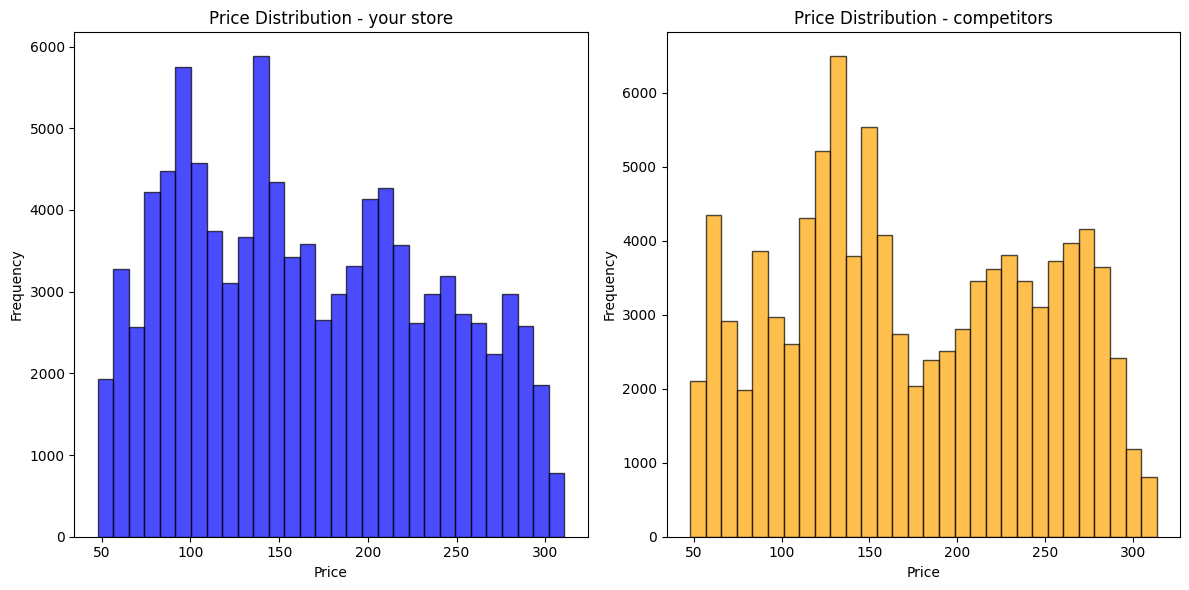

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.hist(data['Price'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Price Distribution - your store')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Competition_Price'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title('Price Distribution - competitors')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

these histograms show that prices of the competitors are set higher and peaks around 100-150 and 200-250 ranges, indicating a concentration of high priced items. in contrast our store prices are more evenly distributed around 50-300 range with notable peaks 100-150 range.

comparing the prices vs sales using scatterplot

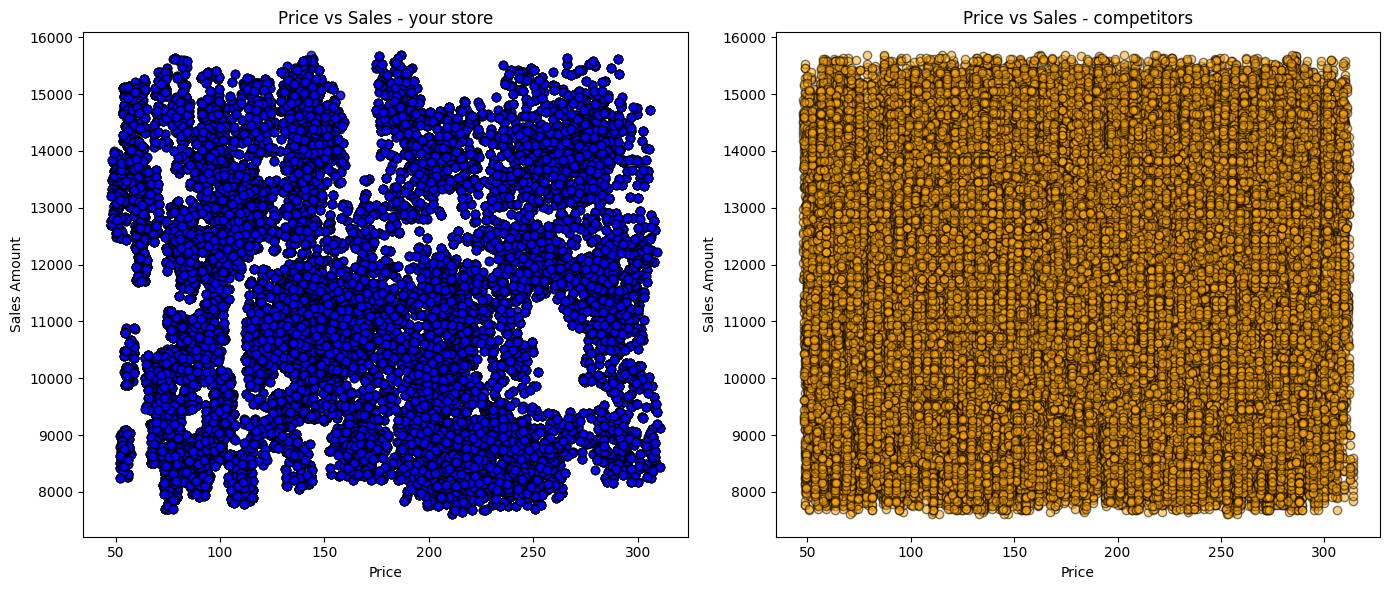

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(data['Price'], data['Sales_Amount'], color='blue', edgecolor='black', alpha=0.5)
plt.title('Price vs Sales - your store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')

plt.subplot(1, 2, 2)
plt.scatter(data['Competition_Price'], data['Sales_Amount'], color='orange', edgecolor='black', alpha=0.5)
plt.title('Price vs Sales - competitors')
plt.xlabel('Price')
plt.ylabel('Sales Amount')

plt.tight_layout()
plt.show()

these scatterplots show that our store pricing strategy varying sales amounts for different prices indicating no clear trend. the competitors' pricing strategy shows a clear win as the plot has no dispersion.
the competitors show consistent sales performance than our store. this shows that the competitors have a much effective pricing strategy as seen by the high sales amounts distributed across all pricing levels.

comparison of price change over time

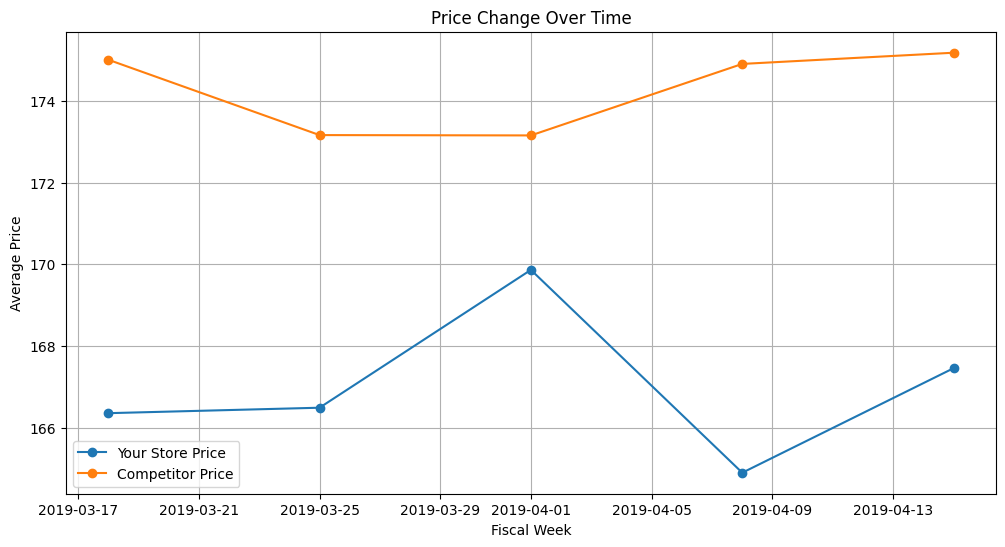

In [ ]:
data['Fiscal_Week_ID'] = pd.to_datetime(data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(12,6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Your Store Price', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competitor Price', marker='o')

plt.title('Price Change Over Time')
plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

the competitors are able to maintain a higher price consistently above 170 while our price starts at around 166. competitors follow a more stable pricing strategy than ours. the stability in the pricing could be the contributing fctor to the competitors' success.

analysis of how changes in prices affect change in qantity sold

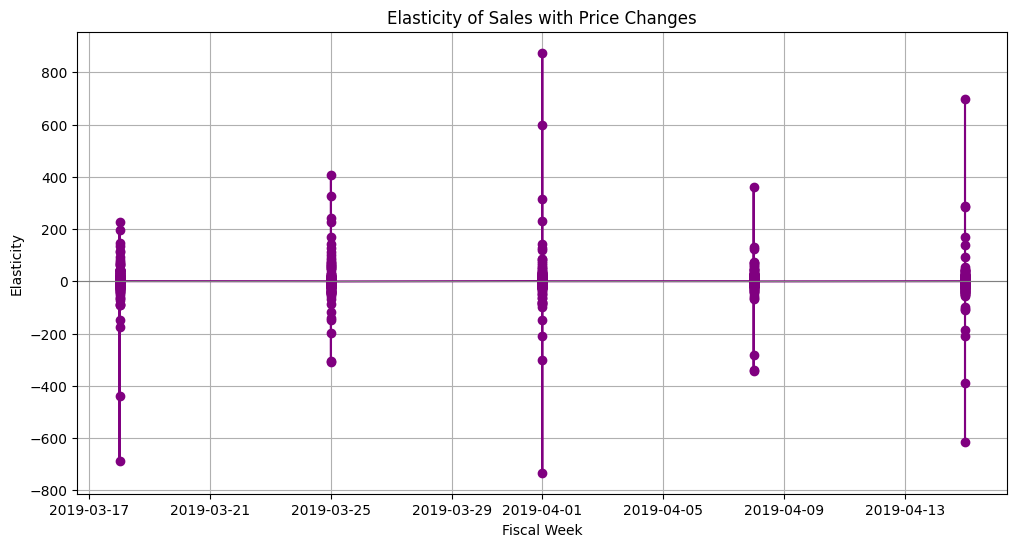

In [ ]:
data['price_change'] = data['Price'].pct_change()
data['quantity_change'] = data['Item_Quantity'].pct_change()

data['elasticity'] = data['quantity_change'] / data['price_change']

data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12,6))
plt.plot(data['Fiscal_Week_ID'], data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.title('Elasticity of Sales with Price Changes')
plt.xlabel('Fiscal Week')
plt.ylabel('Elasticity')
plt.grid(True)
plt.show()

this graph shows significant variability in elasticity of demand over different weeks. the sensitivity of quantity sold to price changes fluctuates considerably. high positive value suggest that in those weeks demand is higher when prices are higher, while higher negative values indicate shaarp drop in demand over price hikes. this distribution of elasticity represents an inconsistent response to price changes, which suggest that factors other than price changes like promotions, seasonality or market changes might be influencing demand.

comparison of total sales amounts of our store and competition

In [ ]:
total_sales_your_store = data['Sales_Amount'].sum()
total_sales_competitors = (data['Competition_Price'] * data['Item_Quantity']).sum()

total_quantity_your_store = data['Item_Quantity'].sum()
total_quantity_competitors = data['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Metric': ['Total Sales', 'Total Quantity'],
    'Your Store': [total_sales_your_store, total_quantity_your_store],
    'Competitors': [total_sales_competitors, total_quantity_competitors]
})

summary

,Metric,Your Store,Competitors
0,Total Sales,1.141005e+08,6.962097e+08
1,Total Quantity,3.984776e+06,3.984776e+06


our store total sales amount is 114,100,500 while competitors is 696,209,700 assuming equal quantity sold. this indicates competitors' pricing strategy is better at making higher revenue.

analysis of sales amount against price brackets

In [ ]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for your store and competition
data['price_bracket'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)
data['competition_price_bracket'] = pd.cut(data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_price_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_price_bracket_your_store.columns = ['Price Bracket', 'Sales Amount (Your Store)']

# calculate sales amount by price bracket for competitors
data['competition_sales_amount'] = data['Competition_Price'] * data['Item_Quantity']
sales_by_price_bracket_competitors = data.groupby('competition_price_bracket')['competition_sales_amount'].sum().reset_index()
sales_by_price_bracket_competitors.columns = ['Price Bracket', 'Sales Amount (Competitors)']

sales_by_price_bracket = pd.merge(sales_by_price_bracket_your_store, sales_by_price_bracket_competitors, on='Price Bracket')

sales_by_price_bracket

<ipython-input-11-a5bdb4d07cf9>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_bracket_your_store = data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
<ipython-input-11-a5bdb4d07cf9>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price_bracket_competitors = data.groupby('competition_price_bracket')['competition_sales_amount'].sum().reset_index()


,Price Bracket,Sales Amount (Your Store),Sales Amount (Competitors)
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


the competitors outperforms our store in all price brackets considered.

price optimization with dynamic pricing

In [ ]:
# calculate average price and total quatity sold for each item
item_summary = data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to original dataset
data = pd.merge(data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
data['segment'] = pd.cut(data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = data[data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['quantity_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['quantity_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

<ipython-input-13-e9310df35100>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
<ipython-input-13-e9310df35100>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['quantity_change'] = segment_data['Item_Quantity'].pct_change()
<ipython-input-13-e9310df35100>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


an average elasticity of 0.071118 for medium segment inicates that this segment is relatively inelastics to price changes. small changes in price will not affect demand, so prices can be changed without losing sales volume.

for the high segment demand is sensitive to price changes. so while optimizing prices we have to find a sweet spot that gives maximum revenues without losing sales volume.


dynamic pricing model

In [ ]:
# creating copy of dataset for simulation
dynamic_pricing_data = data.copy()

# applying dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# caluculate new sales amount based on dynamic prices
dynamic_pricing_data['dynamic_sales_amount'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# comparing total existing sales amount and total dynamic pricing sales amount
total_sales_existing = data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amount'].sum()

# comparing total quantity sold
total_qty_existing = data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


here the prices for medium segment were increased by 5% and for high segment prices were dropped by 10%. as a result for the same quantity sold, the revenue generated increased implying that dynamic pricing helps to improve overal sales revenue.

adding dyamic prices to dataset

In [ ]:
data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [ ]:
data.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,quantity_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amount,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-03-18,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-03-18,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-03-18,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-03-18,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-03-18,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
